
<img src="tpan1.png">



*****

## Exercice 1:<h2>
>On considère le polynôme $p(x) = (x - 1)^6$. 
>
>En développant on
>peut écrire ce même polynôme sous la forme
>$f(x) = x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1.$
>
>1) Avec Matlab évaluer $p(x)$ et $f(x)$ pour $x$ allant de $.998$ à
>$1.002$ en choisissant des pas de $.0001$.
>
>2) Faire un graphique de $f(x)$ et $p(x)$. Commenter.

### Code MATLAB de la fonction horner
```octave
function x = horner(a,z_0)
n = length(a);
result = a(1);
for j = 2:n
    result = result*z_0 + a(j);
endfor
x = result;
end
```

In [10]:
def horner(a,z_0) :
    n= len(a)
    result =a[1]
    for j in (2,n-1):
        result=result*z_0 + a[j]
    return result

In [11]:
import numpy as np
def p(x) : return np.power(x-1,6)
def f(x) : return np.power(x,6) - 6*np.power(x,5) + 15*np.power(x,4) - 20*np.power(x,3) + 15*np.power(x,2) - 6*x + 1

In [12]:
T=[1 ,-6, 15, -20, 15, -6, 1]

# Expression réduite
print('-------p(i)---------')
i=0.998
while (i<=1.002):
    print(p(i))
    i+=0.001

# expression developpée
print('-------f(i)----------')
j=0.998
while (j<=1.002):
    print(f(j))
    j+=0.001

print('-------horner--------')
t=0.998
while (t<=1.002):
    print(horner(T,t))
    t+=0.001


-------p(i)---------
6.400000000000034e-17
1.0000000000000053e-18
0.0
9.999999999993393e-19
6.399999999995771e-17
-------f(i)----------
1.7763568394002505e-15
0.0
0.0
-2.6645352591003757e-15
1.7763568394002505e-15
-------horner--------
9.993976
9.996994
10.0
10.002994
10.005975999999999


#### 2) 

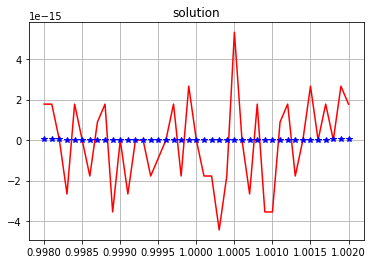

In [14]:
import matplotlib.pyplot as plt
x=[]
y=[]
z=[]
i=0.998

while (i<=1.002):
    x.append(i)
    y.append(f(i))
    z.append(p(i))
    i+=0.0001

plt.plot(x,y,'r',x,z,'b*')
plt.title("solution")
plt.grid(True)
plt.show()


## Expliquer ces sources d'erreurs !!!!

lorsqu'on declare une variable de type float ou double, la machine ne prend pas tous les chiffres aprés la virgule car ils sont illimité, donc lorsqu'on calcule f(x) l'erreur du float s'accumule en calculant la puissance, par contre quand on calcule p(x) l'erreur est accumulé plusieurs fois car la fonction est plus developpé que f(x)




# EXERCICE 2:

>On considère l'équation : $$ f(x)=x^3+x^2-3x-3=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[-2;2]$, puis trouver des intervalles convenables pour appliquer la méthode de >bisection.
>
>2) Utiliser un programme `dicho.m` qui permettra de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.
>
>3) Modifier le programme `dicho.m` pour qu'il donne le nombre d'itération nécessaire pour avoir la solution à $eps$ près.

### Modèle MATLAB \OCTAVE
## 2.1
version MATLAB 1
``` octave 
f=@(x) x.^3+x.^2-3*x-3
```
version MATLAB 2 qui sera enregistré sous le nom `f.m`
``` octave 
function [y]=f(x)
y=x.^3+x.^2-3*x-3
end
```
VERSION 1 PYTHON
``` python
def f(x):
    return x**3+x**2-3*x-3
``` 
version 2 PYTHON
``` python
f= lambda x:x**3+x**2-3*x-3
``` 

## Version Python

In [3]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("solution dans [-2:2]");
plt.xlabel("x")
plt.ylabel ("f(x)")
plt.grid(True)
plt.plot(T,f(T))


# Daprés le graph de $f$ il existe 3 solutions :
- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

`[x]=dicho(f,-2,-1.5,0.001)`

`[x]=diho(f,-2,-1.5,0.001)`

`[x]=dicho(f,-2,-1.5,0.001)`

### Donner la version python de `dicho`

In [4]:
def dicho(a,b,f,n):
    m=(a+b)/2;
    err=abs(b-a);
    while err>n :
        if f(m)==0 : 
            break
            
        if f(a)*f(m)<0 :
            b=m;
        else : a=m;
    
        m=(a+b)/2;
        err=abs(b-a);
    return m;
    

In [5]:
x3=dicho(-2,-1.5,f,10)
x10=dicho(-2,-15,f,10)
x20=dicho(-4,-5,f,20)
print(x3,x10,x20)

-1.75 -11.75 -4.5


In [6]:
print('f(x10)={},f(x20)={}'.format(f(x10),f(x20)))

f(x10)=-1451.921875,f(x20)=-60.375


In [20]:
def dichow(a,b,f,eps):
    g , d = min (a , b) , max (a , b)
    valg , vald = f ( g ) , f ( d )
    n = 0
    while d - g > eps :
        n += 1
        m = ( g + d ) / 2
        valm = f ( m )
        if valg * valm < 0 :
            d = m
            vald = valm
        else :
            g = m
            valg = valm
    print (" nombre d'ité rations né cessaires :", n )
    print ("valeu app :", ( g + d ) / 2)
    return n #( g + d ) / 2

    pass

- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

In [21]:
dichow(-2,-1.5,f,0.0001)

 nombre d'ité rations né cessaires : 13
valeu app : -1.732025146484375


13

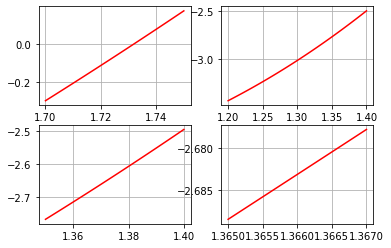

In [9]:
import matplotlib.pyplot as plt
from numpy import linspace
def f(x): return x**3+x**2-3*x-3

t=linspace(1.7,1.75,100);
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=linspace(1.2,1.4,100);
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=linspace(1.35,1.4,100);
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=linspace(1.365,1.367,100);
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


In [22]:
import numpy as np
np.floor(2.3)
np.ceil(2.3)

3.0

In [23]:
import numpy as np
a=-1.5
b=-0.5
p=8 # précision à 10 ^-8 prés
dichow(a,b,f,10**(-p))
#à 10^-8


 nombre d'ité rations né cessaires : 27
valeu app : -0.5000000037252903


27

In [24]:
interval=[[-2,-1.5],[-1.5,-0.5],[1.5,2]]
for u in interval:
    print(dichow(u[0],u[1],f,10**(-3)))
################################################   
print(dichow(-2,-1.5,f,10**(-3)))
print(dichow(-1.5,-0.5,f,10**(-3)))
print(dichow(1.5,2,f,10**(-3)))


 nombre d'ité rations né cessaires : 9
valeu app : -1.73193359375
9
 nombre d'ité rations né cessaires : 10
valeu app : -0.50048828125
10
 nombre d'ité rations né cessaires : 9
valeu app : 1.73193359375
9
 nombre d'ité rations né cessaires : 9
valeu app : -1.73193359375
9
 nombre d'ité rations né cessaires : 10
valeu app : -0.50048828125
10
 nombre d'ité rations né cessaires : 9
valeu app : 1.73193359375
9


Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver $\alpha$ à $10^{-p}$ prés 

$$N \geq E\left(\dfrac{\ln(b-a)+p\ln(10)}{\ln(2)}\right)+1$$

In [25]:

## Ecrire une fonction qui permet de renvoyer le nombre d'itération nécessaire à la méthode de dichotomie pour calculer
## la solution à 10^-p près
ND = lambda a,b,p : int((np.log(b-a) + p*np.log(10))/np.log(2))+1

In [26]:
a=-2
b=-1.5
ND(a,b,5)

16

In [27]:
#alpha 1
dichow(-2,-1.5,f,10**(-5))
#à 10^-8

 nombre d'ité rations né cessaires : 16
valeu app : -1.7320518493652344


16

In [28]:
#alpha 2
dichow(-1.51,-0.5,f,10**(-5))
#à 10^-8

 nombre d'ité rations né cessaires : 17
valeu app : -1.0000028610229492


17

## Méthode graphique pour la recherche de la solution 

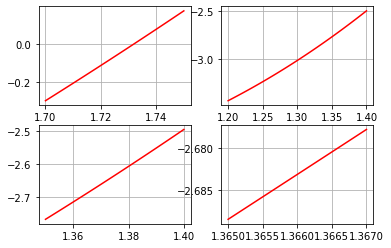

In [29]:
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+x**2-3*x-3

t=np.linspace(1.7,1.75,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


## Transformer le code précédent pour trouver desvaleurs approchées des solutions $\alpha_1$, $\alpha_2$ et $\alpha_3$ de l'equation (E)

In [30]:

def valeur_app(a,b,f,eps,n):
    x=(a+b)/2
    while(n>0):
        if(f(a)*f(x)<0):
            b=x
        if(f(b)*f(x)<0):
            a=b
            b=x
        n=n-1
    return (a+b)/2        


In [32]:
print("premier intervalle________")
a=-2
b=-1.5
epsilon=0.0001
n=dichow(a,b,f,epsilon)
print(valeur_app(a,b,f,epsilon,n))

print("deuxieme intervalle________")
a=-1.5
b=-0.5
n=dichow(a,b,f,epsilon)
print(valeur_app(a,b,f,epsilon,n))

print("3eme intervalle________")
a=1.5
b=2
n=dichow(a,b,f,epsilon)
print(valeur_app(a,b,f,epsilon,n))



premier intervalle________
 nombre d'ité rations né cessaires : 13
valeu app : -1.732025146484375
-1.625
deuxieme intervalle________
 nombre d'ité rations né cessaires : 14
valeu app : -0.500030517578125
-1.0
3eme intervalle________
 nombre d'ité rations né cessaires : 13
valeu app : 1.732025146484375
1.625


# EXERCICE 3:
>On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[1;2]$, puis trouver une valeur approché de la solution à 0.001 près (En >utilisant la fonction zoom du graphique).
>
>2) Vérifier que cette équation est équivalente aux 3 schéma du point fixe suivant:
>
>a) $g_1(x)=\frac{1}{2}\sqrt{10-x^3}=x$.
>
>b) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.
>
>c) $g_3(x)=x-x^3-4x^2+10=x$.
>
>3) Ecrire puis appliquer  une fonction Matlab que l'on appellera  `pointfixe.m` aux trois schémas précédents en prenant >`x0=1.5;eps=0.001`.
>
>4) Quelle est la fonction (parmi $g_1, g_2$ et $g_3$) qui donne la convergence la plus rapide?
>

### Correction <h3>

#### 1)<h4>

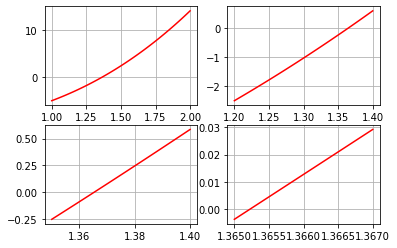

In [60]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+4*x**2-10

t=np.linspace(1,2,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


#### 2) Justification théorique pour la fonction g1

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

a) $g(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

 $$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$

## Calcul symbolique de la dérivée

In [61]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g1=lambda x: 1/2*sqrt(10-x**3)


In [62]:
dg1=lambdify(x,diff(g1(x),x,1))
dg1(1.365)

### Que pouvez vous conclure à propos des convergences de g1

dg1<1 donc g converge localement 

## Justification théoriques pour g2 et g3

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

b) $g(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2=10$$
$$x^2(x+4)=10$$
$$x^2=\frac{10}{x+4}$$
$$x=\sqrt{\displaystyle\frac{10}{4+x}}$$
Donc $ f(x)=g(x)$

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
c) $g(x)=x-x^3-4x^2+10=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2-10+x-x=0$$
$$x^3-4x^2+x-x=10$$
$$x^3-4x^2+x=x+10$$
$$4x^2+x=x-x^3+10$$
$$x=x-x^3-4x^2+10$$
Donc $ f(x)=g(x)$

## Etudier théoriquement la convergences de g2 et g3

$$g3'(x)=-3x^2-6x+1$$
$$|g3'(x)| > 1 $$
pour tout x entre 1 et 2
donc g3 diverge

$$g2'(x) = \displaystyle\frac{-10\sqrt{4+x}}{8\sqrt{10x}+4\sqrt{10}}$$

$$g2'(x)<1$$ 
donc g2 converge

In [3]:
[x,erreur,niter]=pointfixe(g1,1.5,0.001,50)

x =  1.3654
erreur =  0.00053184
niter =  10


In [4]:
[x,erreur,niter]=pointfixe(g2,1.5,0.001,50)

x =  1.3653
erreur =  0.00030773
niter =  4


In [2]:
[x,erreur,niter]=pointfixe(g3,1.5,0.001,50)

pas de convergence avec le nombre d'iteration indique
x =  NaN
erreur =  NaN
niter =  50


#### 4)<h4>

### Donner la solution avec un codepython 


In [34]:
import numpy as np
f=lambda x:  x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*np.sqrt(10-x**3)
g2=lambda x: np.sqrt(10/(x+4))
g3=lambda x: x-x**3-4*x**2 + 10


def ptfixe(g,x0,eps,nmax):
    zero=x0
    
    for i in range (1,nmax): 
        x=zero
        zero=g(x)
        erreur=abs(zero-x)
        if erreur<eps: 
            return x , erreur , i
    print('pas de convergence avec le nombre d''iteration indique')


In [38]:
print(ptfixe(g1,1.5,0.0001,30))

(1.3652772085244786, 7.135822743142839e-05, 13)


In [39]:
print(ptfixe(g2,1.5,0.0001,30))

(1.3652647481134421, 3.915395291720358e-05, 5)


In [46]:
print(ptfixe(g3,1,0.0001,10))

pas de convergence avec le nombre diteration indique
None


### la fonction qui donne la convergence la plus rapide est g2

le nombre d'itération pour chaque méthode convergente
+ $g_2$ donne le resultat en 5 itérations 
+ $g_1$ donne le resultat en 13 itération
+ $g_3$ est divergente

# EXERCICE 4:
>1) On considère la fonction $f(x)=e^{-x}-x$. Ecrire puis appliquer  une fonction Matlab que l'on appellera `newton.m` à la >fonction $f$, en prenant $x0=0$, $eps=0.001$ .
>
>2) Montrer que l'équation $f(x)=0$ admet une solution unique que l'on peut obtenir en utilisant la méthode de Newton à partir >de $x0=1$.

### Correction MATLAB 

#### 1) <h4>

In [65]:
sol=newton(0,0.001)

#### 2) <h4>

In [ ]:
sol=newton(1,0.001)

### Solution Python

## Donner la solution entière avecun code python

In [7]:
import numpy as np
def newton(a,eps):
    x1=a
    x2=x1-f(x1)/fprime(x1)

    while abs(x1-x2)>eps :
        x1=x2
        x2=x1-f(x1)/fprime(x1)
    return x2

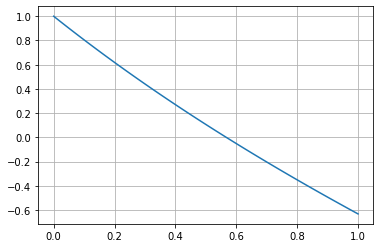

In [8]:
import matplotlib.pyplot as plt
f= lambda x: np.exp(-x)-x
fprime = lambda x: -np.exp(-x)-1
t=np.linspace(0,1,100)
plt.plot(t,f(t))
plt.grid(True)

In [9]:
print(newton(1,0.001))

0.567143285989123
